# TP FINAL - Grupo 9 - Arboles de decisión 

#### Importamos las librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


# Modelos de Clasificación
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold

# Arboles
# ==============================================================================
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance


# Evaluación de modelos
# ==============================================================================
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler


## Análisis Exploratorio

#### Importamos el dataset y realizamos un análisis exploratorio del mismo.

In [2]:
data_location = './Data/All_tipos.csv'
df_virus = pd.read_csv(data_location)

df_virus.head()

,hash,tipo,fs_size,raw_size,file_extension,cantidad_procesos,cantidad_procesos_red,cantidad_objetos,cantidad_DLLs,cantidad_acciones_registros,ATTEMPT_TO_COPY_ITSELF,ATTEMPT_TO_EXECUTE_AFTER_RENAME,VBA_ATTEMPT_TO_CALL_API,IMAGE_HAS_SHARED_MEMORY_SECTION,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA,INTERNAL_HAS_JAVA_CLASS_EXTRACT
0,00883eb40a25c5401b7b82c63d485f6006cf6251,Backdoors,733630,0,exe,1,0,2,53,5,5,2,0,0,0,2
1,0157e0df4dfcb63e10d7c173a5304e26d11dc708,Backdoors,36817155,5741568,exe,6,0,24,263,25,6,4,1,6,65,0
2,05704f6ea9470096a8642ea1f1ba165c2d79cf53,Backdoors,380928,0,dll,2,0,0,5,0,4,0,7,2,0,4
3,06cd99dbda1662c2cfc279d0a93e3cad49dad958,Backdoors,3094987,54272,exe,7,0,4,156,12,5,7,6,7,590,0
4,087ce02c20903ebe83535f95a8ff2919de732fe1,Backdoors,2029026,5120,exe,7,3,0,134,25,2,6,5,1,312,3


In [3]:
# ¿Cuántas observaciones hay en la tabla? 
df_virus.shape

(1485, 16)

In [4]:
# ¿Tenemos datos faltantes?
df_virus.isna().info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   hash                                    1485 non-null   bool 
 1   tipo                                    1485 non-null   bool 
 2   fs_size                                 1485 non-null   bool 
 3   raw_size                                1485 non-null   bool 
 4   file_extension                          1485 non-null   bool 
 5   cantidad_procesos                       1485 non-null   bool 
 6   cantidad_procesos_red                   1485 non-null   bool 
 7   cantidad_objetos                        1485 non-null   bool 
 8   cantidad_DLLs                           1485 non-null   bool 
 9   cantidad_acciones_registros             1485 non-null   bool 
 10  ATTEMPT_TO_COPY_ITSELF                  1485 non-null   bool 
 11  ATTEMPT_TO_EXECUT

In [5]:
#Cantidad de variables target
df_virus['tipo'].unique()

array(['Backdoors', 'Downloader', 'Dropper', 'Filecoder', 'Riskware'],
      dtype=object)

In [6]:
# ¿Cómo se distribuye las variables target?
df_virus['tipo'].value_counts(normalize=True)

Dropper       0.363636
Downloader    0.290909
Filecoder     0.143434
Backdoors     0.120539
Riskware      0.081481
Name: tipo, dtype: float64

In [7]:
# ¿Dentro de qué rango se encuentran las variables?
df_virus.describe()

,fs_size,raw_size,cantidad_procesos,cantidad_procesos_red,cantidad_objetos,cantidad_DLLs,cantidad_acciones_registros,ATTEMPT_TO_COPY_ITSELF,ATTEMPT_TO_EXECUTE_AFTER_RENAME,VBA_ATTEMPT_TO_CALL_API,IMAGE_HAS_SHARED_MEMORY_SECTION,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA,INTERNAL_HAS_JAVA_CLASS_EXTRACT
count,1.485000e+03,1.485000e+03,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,3.021759e+07,3.167315e+06,5.832997,2.455219,12.032323,195.486195,118.557576,2.728620,4.253199,9.257239,8.259933,270.480135,1.824242
std,3.951022e+07,5.978435e+06,7.427393,6.542226,16.386431,246.837503,244.578677,3.117168,6.959490,10.886319,11.240679,332.883739,1.796434
min,2.621440e+05,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.547159e+06,0.000000e+00,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,5.609653e+06,3.840000e+04,3.000000,1.000000,7.000000,154.000000,25.000000,2.000000,2.000000,4.000000,3.000000,50.000000,1.000000
75%,5.812544e+07,5.438176e+06,10.000000,2.000000,19.000000,264.000000,58.000000,5.000000,4.000000,14.000000,9.000000,548.000000,3.000000
max,2.290279e+08,9.028045e+07,91.000000,103.000000,190.000000,4003.000000,2022.000000,13.000000,70.000000,43.000000,69.000000,1000.000000,5.000000


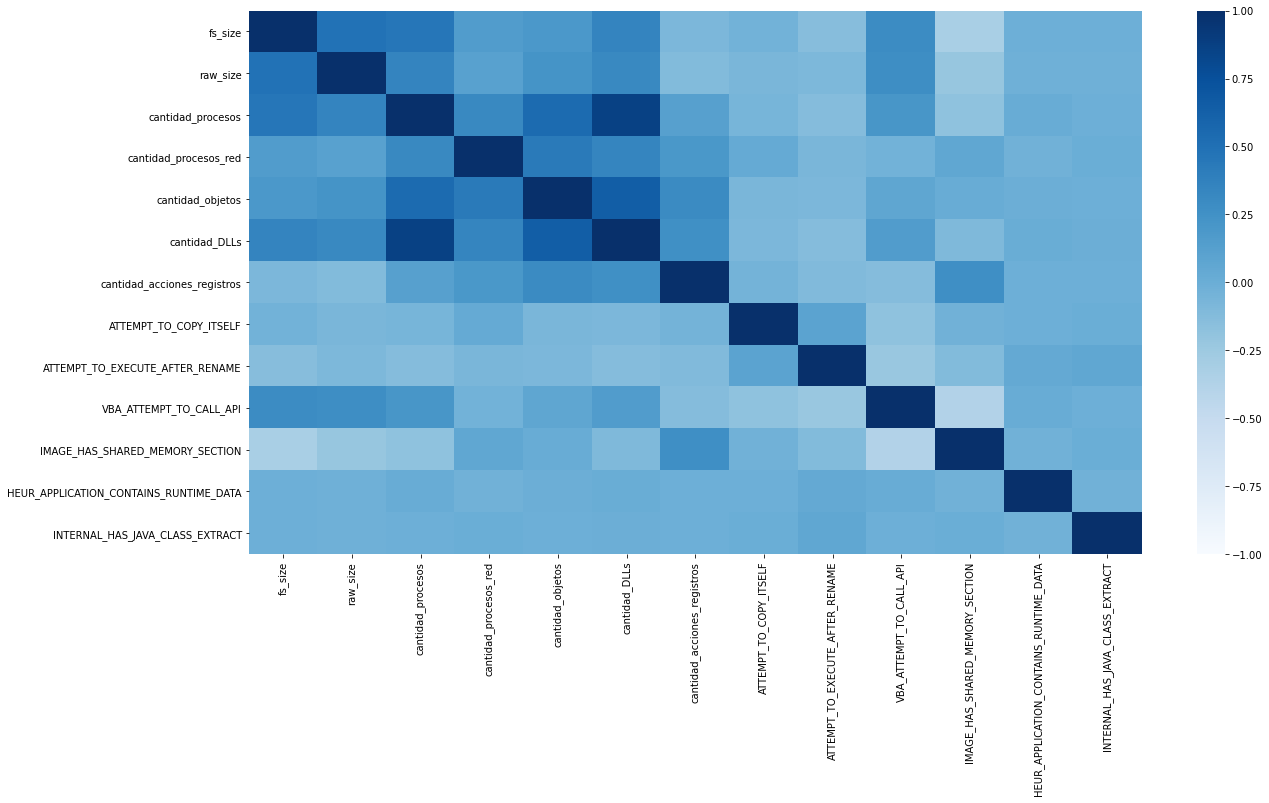

In [8]:
# ¿Qué variables están más correlacionadas?
plt.figure(figsize=(20,10))
sns.heatmap(df_virus.corr(), annot=False, vmin=-1, cmap='Blues');
#Cantidad de DDL tiene una correlación cercana a 1 con cantidad_DLL (lo dejamos a priori para mantener la mayor cantidad de features)

### Preparación de Datos

In [9]:
# Eliminamos los registros que no son numéricos
df_numericals = df_virus.drop(['hash', 'tipo', 'file_extension'],axis=1)

In [10]:
#Reemplazamos las etiquetas categóricas por numéricas
to_replace = ['Backdoors', 'Downloader', 'Dropper', 'Filecoder', 'Riskware']
replace_to = [0,1,2,3,4]
target = df_virus['tipo'].replace(to_replace = to_replace, value = replace_to)
target.value_counts(normalize=True)

2    0.363636
1    0.290909
3    0.143434
0    0.120539
4    0.081481
Name: tipo, dtype: float64

In [11]:
# Preparamos la matriz de features y el vector objetivo
X = df_numericals
y = target

In [12]:
# Separamos un set de testeo para evaluar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

## Arboles de decisión

In [13]:
df_virus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   hash                                    1485 non-null   object
 1   tipo                                    1485 non-null   object
 2   fs_size                                 1485 non-null   int64 
 3   raw_size                                1485 non-null   int64 
 4   file_extension                          1485 non-null   object
 5   cantidad_procesos                       1485 non-null   int64 
 6   cantidad_procesos_red                   1485 non-null   int64 
 7   cantidad_objetos                        1485 non-null   int64 
 8   cantidad_DLLs                           1485 non-null   int64 
 9   cantidad_acciones_registros             1485 non-null   int64 
 10  ATTEMPT_TO_COPY_ITSELF                  1485 non-null   int64 
 11  ATTE

In [14]:
df_numericals = df_virus.drop(['hash', 'tipo', 'file_extension'],axis=1)

In [15]:
#Features
X = df_numericals
type(X)

pandas.core.frame.DataFrame

In [16]:
X.shape

(1485, 13)

In [17]:
y = target
type(y)

pandas.core.series.Series

In [18]:
y.shape

(1485,)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

In [20]:
X_train.shape

(1039, 13)

In [21]:
X_test.shape

(446, 13)

## Entrenamos el árbol de clasificación

In [22]:
tree_1 = tree.DecisionTreeClassifier(random_state=40)

In [23]:
tree_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [24]:
y_train_pred = tree_1.predict(X_train)
y_test_pred = tree_1.predict(X_test)

In [25]:
y_test_pred

array([3, 1, 2, 1, 4, 2, 1, 4, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 4,
       1, 1, 2, 2, 1, 0, 1, 2, 2, 3, 2, 1, 4, 4, 0, 2, 1, 3, 3, 4, 3, 2,
       2, 1, 0, 3, 2, 0, 1, 2, 3, 2, 3, 1, 1, 2, 1, 2, 3, 1, 2, 2, 0, 0,
       1, 2, 2, 0, 3, 2, 1, 2, 3, 0, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 3,
       1, 3, 1, 2, 2, 2, 2, 0, 4, 0, 3, 2, 1, 2, 4, 4, 2, 2, 1, 2, 3, 3,
       1, 2, 2, 2, 3, 2, 2, 2, 0, 1, 1, 1, 1, 3, 2, 2, 0, 0, 3, 3, 4, 2,
       4, 2, 1, 4, 2, 0, 1, 1, 2, 2, 2, 0, 3, 4, 1, 2, 1, 1, 0, 3, 0, 1,
       2, 0, 3, 2, 3, 3, 4, 2, 1, 4, 3, 2, 0, 2, 1, 0, 3, 1, 3, 3, 2, 2,
       2, 3, 2, 2, 1, 4, 4, 2, 3, 4, 2, 1, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1,
       2, 3, 2, 0, 3, 2, 1, 1, 2, 1, 3, 2, 2, 2, 1, 2, 3, 3, 2, 2, 3, 2,
       0, 2, 3, 0, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 2, 1, 3, 1, 3, 2, 2, 2,
       2, 1, 1, 2, 4, 3, 2, 4, 4, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 2, 1,
       1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 3, 0, 4, 2, 0, 0, 2, 0,
       1, 0, 3, 3, 1, 1, 2, 3, 1, 4, 2, 1, 1, 2, 1,

## Performance del modelo

In [26]:
confusion_matrix(y_train, y_train_pred)

array([[133,   0,   0,   0,   0],
       [  0, 293,   0,   0,   0],
       [  0,   0, 385,   0,   0],
       [  0,   0,   0, 144,   0],
       [  0,   0,   0,   0,  84]], dtype=int64)

In [27]:
confusion_matrix(y_test, y_test_pred)

array([[ 23,   1,   4,  16,   2],
       [  6, 128,   1,   3,   1],
       [  6,   0, 148,   1,   0],
       [ 16,   5,   2,  45,   1],
       [  1,   4,   0,   1,  31]], dtype=int64)

In [28]:
accuracy_score(y_test, y_test_pred)

0.8408071748878924

In [29]:
## vemos las feautures importances

In [30]:
pd.DataFrame({'atributo':X.columns, 'importancia':tree_1.feature_importances_}).sort_values('importancia', ascending = False)

,atributo,importancia
10,IMAGE_HAS_SHARED_MEMORY_SECTION,0.320157
9,VBA_ATTEMPT_TO_CALL_API,0.219300
8,ATTEMPT_TO_EXECUTE_AFTER_RENAME,0.129918
0,fs_size,0.084704
1,raw_size,0.076668
5,cantidad_DLLs,0.042727
6,cantidad_acciones_registros,0.030057
4,cantidad_objetos,0.026853
11,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA,0.020556
7,ATTEMPT_TO_COPY_ITSELF,0.017514


In [31]:
# graficamos el modelo
dot_data = tree.export_graphviz(tree_1, out_file=None,feature_names= X_train.columns, filled = True)

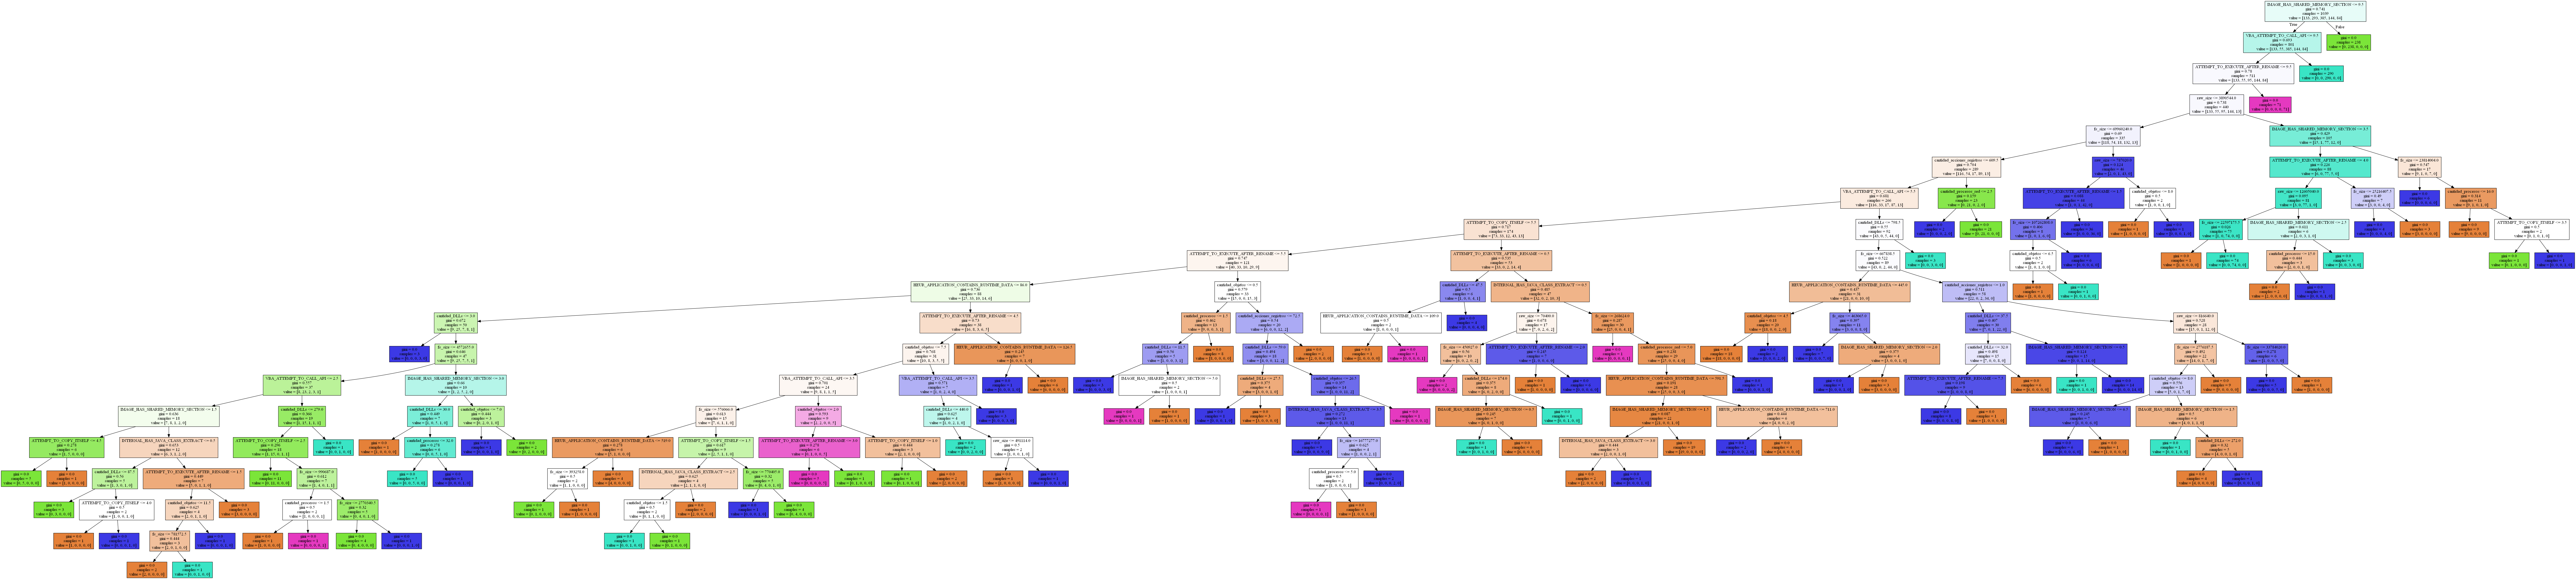

In [32]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Reducimos la altura del arbol
Definimos los siguientes hiper-parámetros:
 - min_samples_leaf = 20
 - max_depth = 5  

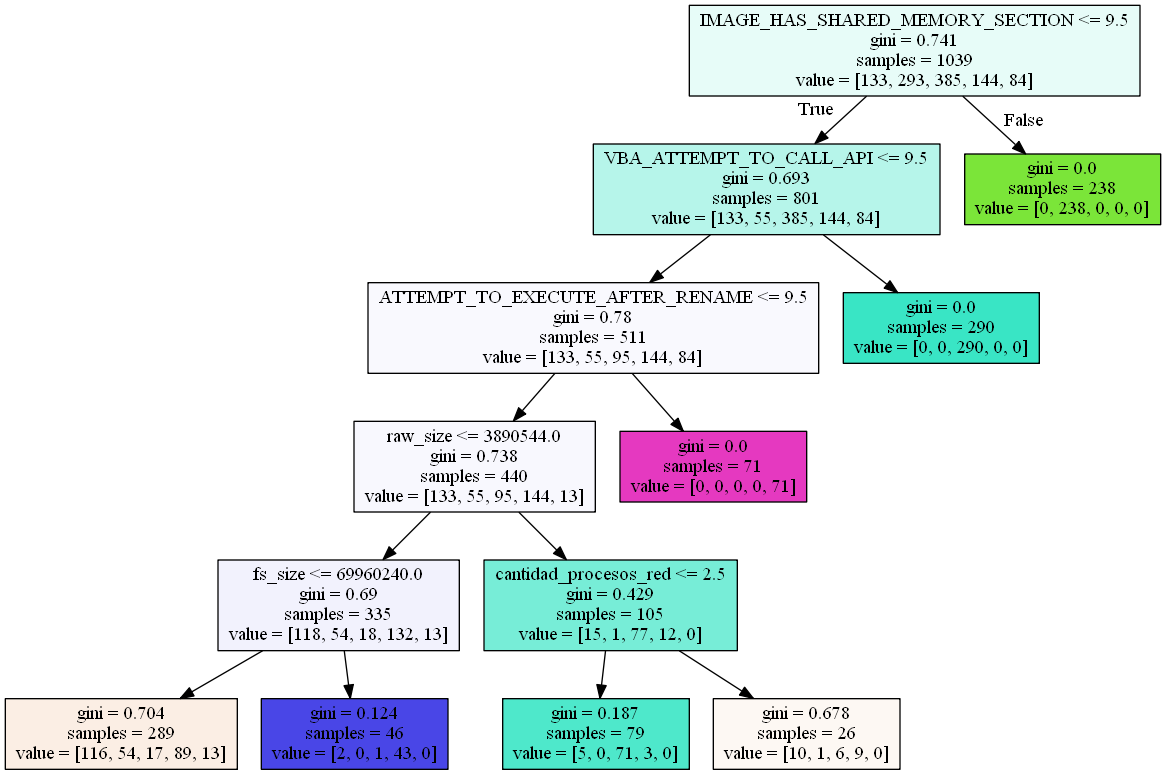

In [33]:
tree_2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=5, random_state=40)
tree_2.fit(X_train, y_train)
dot_data = tree.export_graphviz(tree_2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [34]:
#Verificamos la performance del modelo
accuracy_score(y_test, tree_2.predict(X_test))

0.7802690582959642

In [35]:
#matriz de confusión
confusion_matrix(y_test, tree_2.predict(X_test))

array([[ 43,   0,   2,   1,   0],
       [ 30, 108,   1,   0,   0],
       [  9,   0, 146,   0,   0],
       [ 46,   0,   3,  20,   0],
       [  6,   0,   0,   0,  31]], dtype=int64)

In [36]:
# Vemos las features importances
pd.DataFrame({'atributo':X.columns, 'importancia':tree_2.feature_importances_}).sort_values('importancia', ascending = False)

,atributo,importancia
10,IMAGE_HAS_SHARED_MEMORY_SECTION,0.405942
9,VBA_ATTEMPT_TO_CALL_API,0.297020
8,ATTEMPT_TO_EXECUTE_AFTER_RENAME,0.139098
1,raw_size,0.092037
0,fs_size,0.041997
3,cantidad_procesos_red,0.023906
2,cantidad_procesos,0.000000
4,cantidad_objetos,0.000000
5,cantidad_DLLs,0.000000
6,cantidad_acciones_registros,0.000000


## Utilizamos gridsearch para optimizar el modelo

In [37]:
# definimos los parametros
params_grid = { "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20,None], 
                "max_depth" : [1,2,3,4,5,6,8,9,10,11,12,13,14,None],
                "min_samples_split": [2, 3, 4,None]}

In [38]:
grid_search = GridSearchCV(tree_1, params_grid,
                           n_jobs=-1, scoring='accuracy')

In [39]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13,
                                       14, None],
                         'min_samples_leaf': [5, 10, 15, 20, None],
                         'min_samples_split': [2, 3, 4, None]},
             scoring='accuracy')

In [40]:
#Score durante el entrenamiento.
grid_search.best_score_

0.8450761798587886

In [41]:
grid_search.best_params_ 

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [42]:
cv_clf = grid_search.best_estimator_
cv_clf

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=5,
                       random_state=40)

In [43]:
#verificamos la performance con el mejor estimador
accuracy_score(y_test, cv_clf.predict(X_test))

0.8699551569506726

In [44]:
confusion_matrix(y_test, cv_clf.predict(X_test))

array([[ 30,   1,   4,  11,   0],
       [  2, 135,   2,   0,   0],
       [  2,   1, 151,   1,   0],
       [ 22,   3,   3,  41,   0],
       [  3,   2,   0,   1,  31]], dtype=int64)

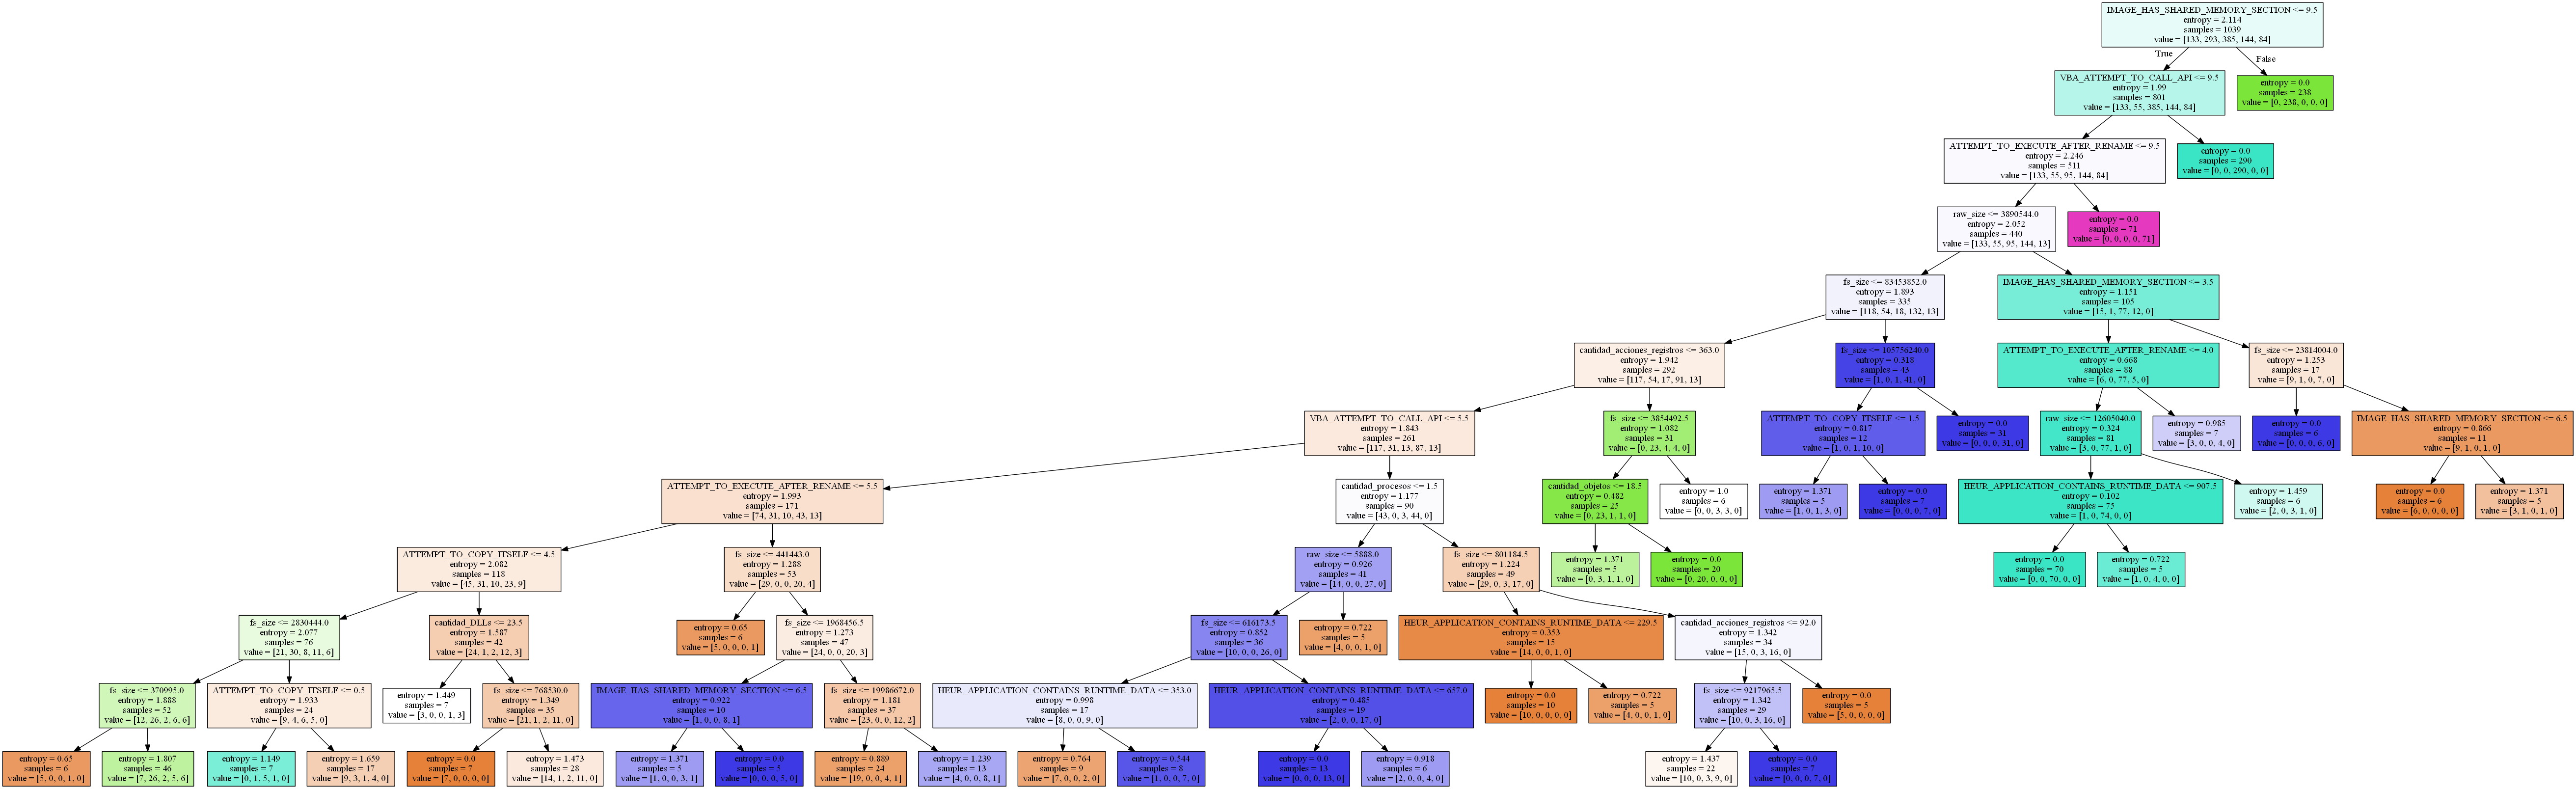

In [45]:
#graficamos
dot_data = tree.export_graphviz(cv_clf, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [46]:
#finalmente vemos las features importances
pd.DataFrame({'atributo':X.columns, 'importancia':cv_clf.feature_importances_}).sort_values('importancia', ascending = False)

,atributo,importancia
10,IMAGE_HAS_SHARED_MEMORY_SECTION,0.346312
9,VBA_ATTEMPT_TO_CALL_API,0.256682
8,ATTEMPT_TO_EXECUTE_AFTER_RENAME,0.158840
1,raw_size,0.086201
0,fs_size,0.081995
6,cantidad_acciones_registros,0.031557
7,ATTEMPT_TO_COPY_ITSELF,0.018291
11,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA,0.008113
5,cantidad_DLLs,0.004962
2,cantidad_procesos,0.004271


## Probamos con Bagging

In [47]:
#con el arbol creado, generamos el meta-modelo (utilizando 1000 estimadores).
bag_clf = BaggingClassifier(base_estimator=tree_1, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [48]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=40),
                  n_estimators=1000, n_jobs=-1, random_state=42)

In [49]:
#matriz de confusión
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[ 33,   0,   0,  13,   0],
       [  3, 133,   2,   1,   0],
       [  2,   0, 151,   2,   0],
       [ 12,   1,   0,  56,   0],
       [  3,   0,   0,   2,  32]], dtype=int64)

In [50]:
#finalmente el accuracy
accuracy_score(y_test, bag_clf.predict(X_test))

0.9080717488789237

## Probamos con Random Forest

In [51]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [52]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [53]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[ 32,   0,   0,  14,   0],
       [  3, 133,   2,   0,   1],
       [  0,   0, 154,   1,   0],
       [ 10,   1,   1,  55,   2],
       [  3,   0,   0,   2,  32]], dtype=int64)

In [54]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.9103139013452914

## Extra Trees Classifier

In [55]:
et = ExtraTreesClassifier(n_estimators=10000, class_weight='balanced', random_state=1)

In [56]:
et.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', n_estimators=10000,
                     random_state=1)

In [57]:
confusion_matrix(y_test, et.predict(X_test))

array([[ 33,   1,   3,   9,   0],
       [  4, 133,   2,   0,   0],
       [  0,   0, 154,   1,   0],
       [ 16,   3,   0,  48,   2],
       [  2,   2,   0,   3,  30]], dtype=int64)

In [58]:
accuracy_score(y_test, et.predict(X_test))

0.8923766816143498

## Utilizamos los modelos entrenados para Clasificar las observaciones de los Clusters

In [59]:
cluster_0 = pd.read_csv('./Data/cluster_0.csv')

In [60]:
X0 = cluster_0.drop(['Unnamed: 0', 'index','hash', 'pais', 'file_extension'],axis=1)
X0.head()

,fs_size,raw_size,cantidad_procesos,cantidad_procesos_red,cantidad_objetos,cantidad_DLLs,cantidad_acciones_registros,ATTEMPT_TO_COPY_ITSELF,ATTEMPT_TO_EXECUTE_AFTER_RENAME,VBA_ATTEMPT_TO_CALL_API,IMAGE_HAS_SHARED_MEMORY_SECTION,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA,INTERNAL_HAS_JAVA_CLASS_EXTRACT
0,1379555,0,2,0,6,56,0,4,7,7,1,595,0
1,8371415,769024,11,2,37,327,7,0,5,6,0,437,7
2,335884,0,1,0,0,1,0,8,8,5,2,600,3
3,294924,0,1,0,0,1,0,6,5,2,2,0,0
4,3717930,0,5,0,15,161,46,0,7,6,0,471,0


In [61]:
df_numericals.columns == X0.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [62]:
rf_cluster_0 = pd.Series(rf_clf.predict(X0))

In [63]:
rf_cluster_0.value_counts(normalize=True)

0    0.685752
3    0.230360
1    0.056813
2    0.019530
4    0.007545
dtype: float64

In [64]:
#probamos con el arbol optimizado
cv_cluster_0 = pd.Series(cv_clf.predict(X0))

In [65]:
cv_cluster_0.value_counts(normalize=True)

0    0.684865
3    0.186862
1    0.104749
2    0.023524
dtype: float64

In [66]:
X0.shape

(2253, 13)

In [67]:
#Cluster 1

In [68]:
cluster_1 = pd.read_csv('./Data/cluster_1.csv')

In [69]:
X1 = cluster_1.drop(['Unnamed: 0', 'index','hash', 'pais', 'file_extension'],axis=1)
X1.head()

,fs_size,raw_size,cantidad_procesos,cantidad_procesos_red,cantidad_objetos,cantidad_DLLs,cantidad_acciones_registros,ATTEMPT_TO_COPY_ITSELF,ATTEMPT_TO_EXECUTE_AFTER_RENAME,VBA_ATTEMPT_TO_CALL_API,IMAGE_HAS_SHARED_MEMORY_SECTION,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA,INTERNAL_HAS_JAVA_CLASS_EXTRACT
0,60054931,18800384,13,13,24,452,131,7,2,3,6,0,5
1,132339067,0,75,8,120,2397,52,0,1,0,3,588,0
2,60137875,18808064,13,22,28,483,131,6,4,5,1,0,5
3,53751191,16141568,13,13,24,446,131,5,3,0,7,0,6
4,60826007,18979072,13,14,26,466,130,3,4,6,7,0,0


In [70]:
df_numericals.columns == X1.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [71]:
rf_cluster_1 = pd.Series(rf_clf.predict(X1))

In [72]:
rf_cluster_1.value_counts(normalize=True)

0    0.632812
3    0.246094
2    0.113281
1    0.007812
dtype: float64

## XGBoost

In [73]:
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

In [74]:
model_xg = XGBClassifier(n_jobs=-1, use_label_encoder=False)

In [75]:
#optimizamos los parametros
params = {  
    "n_estimators": [50,100,500],      # Number of boosted trees to fit.
    "max_depth": [1,2,3,4],            # Maximum tree depth for base learners.
    "learning_rate": [0.01, 0.1],      # Boosting learning rate (xgb’s “eta”)
}

In [76]:
xgb = GridSearchCV(model_xg, param_grid=params, cv=cv, verbose=1, n_jobs=-1)

In [77]:
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   54.7s finished


[19:12:11] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missin...tone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
       

In [78]:
xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [79]:
xgb_best_est = xgb.best_estimator_
xgb_best_est

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [80]:
accuracy_score(y_test, xgb_best_est.predict(X_test))

C:\Users\user\anaconda3\envs\dhdsblend2021\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9035874439461884

In [81]:
xgb.predict(X_test)

array([0, 1, 2, 1, 4, 2, 1, 4, 0, 0, 0, 0, 2, 1, 1, 1, 1, 4, 1, 2, 1, 4,
       1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 4, 4, 3, 2, 1, 3, 3, 4, 3, 2,
       2, 1, 0, 1, 2, 0, 1, 2, 3, 2, 3, 1, 0, 2, 1, 2, 3, 1, 2, 2, 3, 2,
       1, 2, 2, 3, 0, 2, 1, 2, 3, 3, 0, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 3,
       1, 2, 1, 2, 2, 2, 2, 3, 0, 0, 0, 2, 1, 2, 4, 4, 2, 2, 3, 2, 3, 3,
       1, 2, 2, 2, 3, 2, 2, 2, 0, 1, 1, 1, 1, 3, 2, 2, 0, 0, 3, 3, 4, 2,
       4, 2, 1, 4, 2, 1, 1, 1, 2, 2, 2, 3, 3, 4, 1, 2, 1, 1, 0, 3, 2, 1,
       2, 0, 0, 2, 2, 3, 4, 0, 1, 4, 0, 2, 3, 2, 1, 0, 3, 1, 3, 0, 2, 2,
       2, 3, 2, 2, 1, 4, 4, 2, 3, 4, 2, 1, 2, 1, 3, 2, 2, 2, 1, 1, 2, 1,
       2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 3, 2, 2, 2, 1, 3, 3, 3, 2, 3, 3, 2,
       2, 2, 3, 3, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 1, 3, 1, 3, 2, 2, 2,
       2, 1, 1, 2, 4, 3, 2, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 3, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 4, 2, 0, 3, 2, 4,
       1, 3, 3, 3, 1, 1, 2, 3, 1, 4, 2, 1, 1, 2, 1,

In [82]:
xgb_cluster_0 = pd.Series(xgb.predict(X0))

In [83]:
xgb_cluster_0.value_counts(normalize=True)

0    0.716378
3    0.160675
1    0.083000
2    0.031957
4    0.007989
dtype: float64

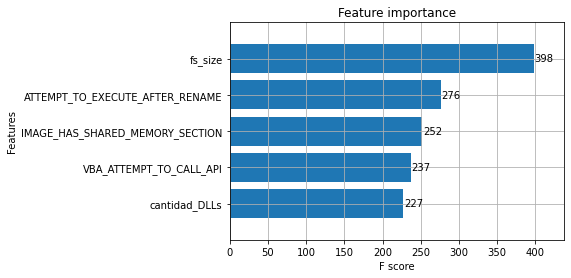

In [84]:
#Graficamos la importancia de los atributos optimizados
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=5);

In [85]:
xgb_cluster_1 = pd.Series(xgb.predict(X1))

In [86]:
xgb_cluster_1.value_counts(normalize=True)

0    0.679688
3    0.246094
2    0.070312
1    0.003906
dtype: float64